<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/7.%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC%EC%9D%98%EC%A0%84%EC%B2%98%EB%A6%AC%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7. 자연어 처리의 전처리 활용

##7.1 영화 선택해서 리뷰 긁어오기

In [0]:
import requests
from bs4 import BeautifulSoup

자전차왕 엄복동 리뷰를 긁어보자

In [2]:
test_url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=159070&type=after&page=1"
resp = requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser')
html


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>네이버 영화</title>
<link href="https://ssl.pstatic.net/static/m/movie/icons/naver_movie_favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/css/common.css?20200515103320" rel="stylesheet" type="text/css">
<link href="/css/movie_tablet.css?20200515103320" rel="stylesheet" type="text/css"/>
<link href="/css/movie_end.css?20200515103320" rel="stylesheet" type="text/css"/>
<script src="/js/deploy/movie.all.js?20200515103320" type="text/javascript"></script>
</link></head>
<body>
<!-- content -->
<input id="movieCode" name="movieCode" type="hidden" value="159070"/>
<input id="onlyActualPointYn" name="onlyActualPointYn" type="hidden" value="N"/>
<input id="includeSpoilerYn" name="includeSpoilerYn" type="hidden" value="N"/>
<input id="order" name="order" type="hidden" value="sympathyScore"/>
<input id="page" name="page" type="hidden" value="1"/>
<div clas

In [3]:
score_result = html.find('div', {'class': 'score_result'})
lis = score_result.findAll('li')
lis[0]

<li>
<div class="star_score">
<span class="st_off"><span class="st_on" style="width:10.0%"></span></span><em>1</em>
</div>
<div class="score_reple">
<p>
<!-- 스포일러 컨텐츠로 처리되는지 여부 -->
<span id="_filtered_ment_0">
														
															
															
																곧 있으면 자동차왕곽한구 나올 기새네 
															
														
														
													</span>
</p>
<dl>
<dt>
<em>
<a href="#" onclick="javascript:showPointListByNid(15330418, 'after');parent.clickcr(this, 'ara.uid', '', '', event); return false;" target="_top">
<span>초코파이(andy****)</span>
</a>
</em>
<em>2019.02.27 11:06</em>
</dt>
<dd>
<a class="go_report2" href="#" onclick="parent.clickcr(this, 'ara.report', '', '', event); common.report('false','andy****', 'uEfTLhSLUxE29WOhDEups/wnwp/LFKX9KwgeryGNhfg=', '곧 있으면 자동차왕곽한구 나올 기새네 ', '15330418', 'point_after', false);return false;"><em>신고</em></a>
</dd>
</dl>
</div>
<div class="btn_area">
<a class="_sympathyButton" href="#" onclick="parent.clickcr(this, 'ara.sym', '', '', even

In [4]:
review_text = lis[0].find('p').getText()
review_text.strip()

'곧 있으면 자동차왕곽한구 나올 기새네'

In [5]:
score = lis[0].find('em').getText()
score

'1'

In [6]:
for lis_ in lis:
    comment = lis_.find('p').getText().strip()
    score = lis_.find('em').getText()
    print(comment,score)

곧 있으면 자동차왕곽한구 나올 기새네 1
배우 정지훈... 히트작 구경한 지가  언제냐... 이 영화 망하고 나면 그나마도 못 나오겠네. 집에서 태희 누나한테 잘 해주고  좋은 데 많이 놀러 다녀. 행복이 최고다^^ 모아둔 돈 많잖아. 1
이젠 관객들 푯값도 훔쳐가네 1
전차왕 계엄폭동 ㅋㅋㅋ 1
리얼,악녀,염력,인랑,물괴,창궐,엄복동 1
이런영화에 100억을 투자를 한거라구??정지훈 연기 왜이렇구 못하냐??  술먹고 인스타할 시간에, 연기공부좀 해라!! 술주정으로 인스타 하지 말구그리고 주식먹튀한거 사과하고  배우활동 하길뻔뻔하다 참.. ㅉㅉ 1
1점을 준 이유는 0점이 없기 때문이다 1
이거보지말고 피시방7시간이 좋습니다. 1
실제 엄복동 이라는 인물이 절도범에 장물아비 때문에 감옥간 사실은 알고 영화 개봉하는거임??이제 범죄자가 영웅이되어 영화까지 만들어지는 세상이네 ㅋㅋㅋ 1
제목만 봐도 스트레스가...애국심 마켓팅 그만합시다3.1운동 100주년 맞춰 개봉하면 천만관객 동원할 줄 알았나요? 1


In [7]:
import time
import pandas as pd
score_df = pd.DataFrame(columns=['comment','score'])
score_df

,comment,score


In [8]:
page_num = 1
index = 0
while True:
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=159070&type=after&page="+f'{page_num}'
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    score_result = html.find('div', {'class': 'score_result'})
    lis = score_result.findAll('li')
    for lis_ in lis:
        comment = lis_.find('p').getText().strip().replace("\n","").replace('\t','').replace('\r','')
        comment = comment.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
        comment = comment.replace("관람객","")
        comment = comment.replace("스포일러가 포함된 감상평입니다.","")
        comment = comment.replace("감상평 보기","")
        score = lis_.find('em').getText()
        if ('관람객' in comment) or ('관람객' in score):continue
        score_df.loc[index] = [comment,score]
        if index%300==0:
            print(f'{index}의 리뷰를 탐색함')
            print(comment,score)
            print('-------------------'*3)
        index+=1
        
    page_num+=1
    if index>5000:break

0의 리뷰를 탐색함
곧 있으면 자동차왕곽한구 나올 기새네 1
---------------------------------------------------------
300의 리뷰를 탐색함
스토리가 너무 엉성해요ㅠㅠ 1
---------------------------------------------------------
600의 리뷰를 탐색함
정석원 뽕맞은 연기가 젤 리얼함~ 5
---------------------------------------------------------
900의 리뷰를 탐색함
환불및 정신적 피해 보상을 요구함니다 아직도 충격이 가시질 않는 쓰레기 망작 영화.  사죄하라 1
---------------------------------------------------------
1200의 리뷰를 탐색함
강소라씨 팬으로써 말씀드리는데 제발 작품좀 가려하세요~~ 변혁의 사랑하고 엄복동은 너무 심했어요~ 1
---------------------------------------------------------
1500의 리뷰를 탐색함
1점도 아까워요. 아이티브에서 무료일때 보삼 2
---------------------------------------------------------
1800의 리뷰를 탐색함
1점 주고 갑니다ㅡㅡㅋㅋ 1
---------------------------------------------------------
2100의 리뷰를 탐색함
영화 내적으로맛 보았을 때 매력적인 케릭터와 소재. 의외로 자전차 경주 촬영이 괜찮다. 영화를 순식간에 무너뜨리는건 후반부 과한 신파와 뻔한 일제시대의 클리셰들. 5
---------------------------------------------------------
2400의 리뷰를 탐색함
평점 조작해서 극과극을 달리는 영화 역사에 남을거다 1
---------------------------------------------------------
2700의 리뷰를 탐색함
재미1도

In [9]:
score_df.head()

,comment,score
0,곧 있으면 자동차왕곽한구 나올 기새네,1
1,배우 정지훈... 히트작 구경한 지가 언제냐... 이 영화 망하고 나면 그나마도 ...,1
2,이젠 관객들 푯값도 훔쳐가네,1
3,전차왕 계엄폭동 ㅋㅋㅋ,1
4,"리얼,악녀,염력,인랑,물괴,창궐,엄복동",1


##7.2 리뷰 전처리

In [10]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 234kB/s 
     |████████████████████████████████| 3.6MB 46.9MB/s 
     |████████████████████████████████| 92kB 11.2MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-06-01 01:27:23--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz

In [0]:
from konlpy.tag import Mecab
import numpy as np
import matplotlib.pyplot as plt

stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
tokenizer = Mecab()

In [12]:
print('전체 샘플의 수 : {}'.format(len(score_df)))

전체 샘플의 수 : 5010


In [13]:
temp = tokenizer.morphs(score_df.loc[2,'comment'])
print(temp)
temp = [word for word in temp if not word in stopwords]
print(temp)

['이젠', '관객', '들', '푯값', '도', '훔쳐', '가', '네']
['이젠', '관객', '푯값', '훔쳐', '네']


In [14]:
tokenized=[]
for sentence in score_df['comment']:
    temp = []
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

print(tokenized[:10])

[['곧', '있', '으면', '자동차', '왕', '곽한구', '나올', '기', '새', '네'], ['배우', '정지훈', '.', '..', '히트', '작', '구경', '지', '언제', '냐', '.', '..', '영화', '망하', '고', '나', '면', '그나마', '못', '나오', '겠', '네', '.', '집', '에서', '태희', '누나', '한테', '해', '주', '고', '좋', '데', '많이', '놀', '러', '다녀', '.', '행복', '최고', '다', '^^', '모아', '둔', '돈', '많', '잖아', '.'], ['이젠', '관객', '푯값', '훔쳐', '네'], ['전차', '왕', '계엄', '폭동', 'ㅋㅋㅋ'], ['리얼', ',', '악녀', ',', '염력', ',', '인', '랑', ',', '물괴', ',', '창궐', ',', '엄복동'], ['이런', '영화', '100', '억', '을', '투자', '거', '라구', '?', '?', '정지훈', '연기', '왜', '이렇', '구', '못하', '냐', '?', '?', '술', '먹', '고', '인', '스타', '할', '시간', ',', '연기', '공부', '해라', '!', '!', '술주정', '인', '스타', '하', '지', '말', '구', '그리고', '주식', '먹', '튀', '거', '사과', '하', '고', '배우', '활동', '하', '길', '뻔뻔', '하', '다', '참', '.', '.', 'ㅉㅉ'], ['1', '점', '을', '준', '이유', '0', '점', '없', '기', '때문', '다'], ['이거', '보', '지', '말', '고', '피시방', '7', '시간', '좋', '습니다', '.'], ['실제', '엄복동', '라는', '인물', '절도범', '장물아비', '때문', '감옥', '간', '사실', '알', '고', '영화', '개봉', '하', '

In [15]:
from nltk import FreqDist

vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 7531


In [16]:
vocab['그만']

91

In [17]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


In [18]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

print(encoded[:10])

[[0, 19, 109, 271, 64, 277, 292, 65, 0, 23], [75, 98, 2, 7, 0, 188, 0, 12, 382, 28, 2, 7, 3, 391, 4, 20, 43, 0, 97, 94, 55, 23, 2, 332, 52, 0, 0, 363, 95, 32, 4, 49, 217, 260, 0, 204, 0, 2, 0, 231, 5, 352, 0, 0, 30, 121, 0, 2], [442, 124, 0, 0, 23], [0, 64, 0, 227, 62], [267, 18, 0, 18, 0, 18, 72, 251, 18, 0, 18, 0, 18, 35], [48, 3, 160, 102, 9, 324, 22, 0, 8, 8, 98, 77, 41, 0, 491, 0, 28, 8, 8, 426, 161, 4, 72, 443, 80, 81, 18, 77, 0, 205, 24, 24, 0, 72, 443, 6, 12, 59, 491, 296, 409, 161, 0, 22, 0, 6, 4, 75, 0, 6, 199, 0, 6, 5, 228, 2, 2, 471], [16, 11, 9, 284, 333, 91, 11, 17, 65, 238, 5], [118, 10, 12, 59, 4, 0, 100, 81, 49, 26, 2], [0, 35, 189, 314, 492, 0, 238, 0, 0, 297, 60, 4, 3, 206, 6, 22, 130, 8, 8, 139, 364, 278, 53, 38, 3, 99, 37, 38, 12, 0, 23, 62], [472, 14, 175, 0, 2, 7, 308, 0, 0, 135, 0, 128, 2, 16, 0, 160, 0, 0, 206, 6, 43, 0, 124, 0, 80, 140, 60, 56, 257, 8]]


리뷰의 최대 길이 : 69
리뷰의 최소 길이 : 0
리뷰의 평균 길이 : 15.106786


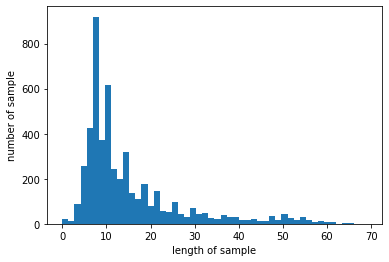

In [19]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [20]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 69
리뷰의 최소 길이 : 69
리뷰의 평균 길이 : 69.000000


In [21]:
print(encoded[:3])

[[0, 19, 109, 271, 64, 277, 292, 65, 0, 23, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [75, 98, 2, 7, 0, 188, 0, 12, 382, 28, 2, 7, 3, 391, 4, 20, 43, 0, 97, 94, 55, 23, 2, 332, 52, 0, 0, 363, 95, 32, 4, 49, 217, 260, 0, 204, 0, 2, 0, 231, 5, 352, 0, 0, 30, 121, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [442, 124, 0, 0, 23, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [0]:
train_df = score_df[:4000]
test_df = score_df[4000:]

train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

In [0]:
from torchtext import data # torchtext.data 임포트
from konlpy.tag import Mecab

# Mecab을 토크나이저로 사용
tokenizer = Mecab()

# 필드 정의
TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=tokenizer.morphs, # 토크나이저로는 Mecab 사용.
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   is_target=True)

In [24]:
from torchtext.data import TabularDataset
train_data, test_data = TabularDataset.splits(
    path='.', train='train_data.csv', test='test_data.csv', format='csv',
    fields=[('comment', TEXT), ('score', LABEL)], skip_header=True)

print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

print(vars(train_data[0]))

훈련 샘플의 개수 : 4000
테스트 샘플의 개수 : 1010
{'comment': ['곧', '있', '으면', '자동차', '왕', '곽한구', '나올', '기', '새', '네'], 'score': '1'}


In [25]:
TEXT.build_vocab(train_data, min_freq=1)
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 6662


In [26]:
TEXT.build_vocab(train_data, min_freq=10, max_size=1500)
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))
print(TEXT.vocab.stoi)

단어 집합의 크기 : 803
defaultdict(<function _default_unk_index at 0x7fb28796d488>, {'<unk>': 0, '<pad>': 1, '.': 2, '이': 3, '영화': 4, '는': 5, '고': 6, '다': 7, '하': 8, '도': 9, '가': 10, '?': 11, '을': 12, '에': 13, '..': 14, '은': 15, '보': 16, '점': 17, '들': 18, '지': 19, '안': 20, '의': 21, '를': 22, '한': 23, '만': 24, '없': 25, '1': 26, '게': 27, ',': 28, '네': 29, '나': 30, '평점': 31, '거': 32, '있': 33, 'ㅋㅋ': 34, '!': 35, '으로': 36, '비': 37, '냐': 38, '로': 39, '습니다': 40, '었': 41, '는데': 42, '돈': 43, '주': 44, '엄복동': 45, '봤': 46, '만들': 47, '자전거': 48, '어': 49, '아': 50, '했': 51, '반일': 52, '왜': 53, '아니': 54, '네요': 55, '진짜': 56, '면': 57, '이런': 58, '너무': 59, '뽕': 60, '겠': 61, '같': 62, '알': 63, '았': 64, '것': 65, '에서': 66, '되': 67, '좋': 68, '...': 69, '수': 70, '국': 71, 'ㅋㅋㅋ': 72, '내': 73, '말': 74, '왕': 75, '음': 76, '기': 77, '어요': 78, '않': 79, '볼': 80, '적': 81, '인': 82, '과': 83, '할': 84, '더': 85, '배우': 86, '듯': 87, '라': 88, '잘': 89, '10': 90, '재밌': 91, '연기': 92, '개': 93, '야': 94, '~': 95, '보다': 96, '시간': 97, '좀': 98, '생

In [27]:
from torchtext.data import Iterator

batch_size = 5
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

batch = next(iter(train_loader)) # 첫번째 미니배치
print(batch.comment)
print(batch.score)

훈련 데이터의 미니 배치 수 : 800
테스트 데이터의 미니 배치 수 : 202
tensor([[394,  15,   4, 339,  21, 276, 244, 276,   3,   7,   0, 276,  88,   0,
         276,   0, 292,   2, 298,   1],
        [101,  52,  12, 721,   4, 104, 179,   9,   0,   9, 527,   1,   1,   1,
           1,   1,   1,   1,   1,   1],
        [ 37,   5,  85,   0,  66,  59,   0, 703,  57,   7, 628, 791,   0,   3,
          20, 326,   2,   1,   1,   1],
        [190,  86, 100,   2,  14, 104,  21, 619,  15, 244,   3, 137, 165,  24,
          13,   0,  12,   0,   0,   5],
        [141,  26,  17,   3,  54,  88, 479,  17,  12,  44,   6, 115,  15,  30,
          21, 401,   3,   7,   1,   1]])
tensor([ 1,  1,  1, 10,  1])


##7.3 분류 모델 만들기

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

learning_rate = 0.001
training_epochs = 20

In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(nn.Linear(20, 32),
                                   nn.ReLU(),
                                   nn.Linear(32, 32),
                                   nn.ReLU(),
                                   nn.Linear(32, 11))

    def forward(self, x):
        out = self.layer(x)
        return out

In [0]:
model = Classifier()
criterion = torch.nn.CrossEntropyLoss()    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [58]:
plot_list = {'train':[], 'test':[]}

for epoch in range(training_epochs):
  model.train()
  train_losses = []
  for batch_number, (X, y) in enumerate(train_loader): # 미니 배치 단위로 꺼내온다. X는 미니 배치, y는 레이블
    #print(batch_number)
    X = X.to(torch.float)

    optimizer.zero_grad()
    output = model(X)
    train_loss = criterion(output, y)
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())

  with torch.no_grad():
    model.eval()
    test_losses = []
    for batch_number, (X, y) in enumerate(test_loader):
      X = X.to(torch.float)

      output = model(X)
      test_loss = criterion(output, y)
      test_losses.append(test_loss.item())

  plot_list['train'].append(sum(train_losses)/len(train_losses))
  plot_list['test'].append(sum(test_losses)/len(test_losses))

  print(f'{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}')
  print(f'{epoch+1} epoch test loss = {sum(test_losses)/len(test_losses)}')
  print('-'*50)

1 epoch train loss = 1.8076992159147631
1 epoch test loss = 1.5293242524165918
--------------------------------------------------
2 epoch train loss = 1.0824020231887699
2 epoch test loss = 1.4184443070599349
--------------------------------------------------
3 epoch train loss = 0.9891666165646166
3 epoch test loss = 1.315448901145765
--------------------------------------------------
4 epoch train loss = 0.9594329733401536
4 epoch test loss = 1.2955049751418652
--------------------------------------------------
5 epoch train loss = 0.9295732722245157
5 epoch test loss = 1.3267111032463537
--------------------------------------------------
6 epoch train loss = 0.9155959261022508
6 epoch test loss = 1.2780474318136084
--------------------------------------------------
7 epoch train loss = 0.900094935297966
7 epoch test loss = 1.3202981069536492
--------------------------------------------------
8 epoch train loss = 0.8813477611914277
8 epoch test loss = 1.3358713862772036
-------------

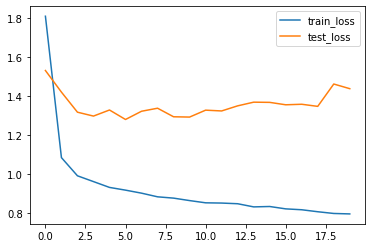

In [59]:
plt.plot(plot_list['train'], label='train_loss')
plt.plot(plot_list['test'], label='test_loss')
plt.legend()
plt.show()